In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [2]:
file_path = "DATA/SBQ_CSV.csv"
data = pd.read_csv(file_path, delimiter=",", quotechar='"', on_bad_lines='skip')

def plot_Method_bar(Methods_counts, context_label="Methods", bar_color="royalblue", max_y_text_pos=18):
    Methods, counts = zip(*Methods_counts)
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(Methods, counts, color=bar_color)

    for bar, count in zip(bars, counts):
        plt.text(bar.get_width() / 2,
                 bar.get_y() + bar.get_height() / 2,
                 str(count),
                 ha='center', va='center', fontsize=12, color='white')

    plt.text(max(counts) * 0.6, max_y_text_pos, context_label,
             fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

    plt.xlabel('Frequency')
    plt.ylabel('Methods')
    plt.tight_layout()
    plt.show()

def plot_Method_wordcloud(Method_counter, title="WordCloud of Unified Methods"):
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Method_counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

Method_mapping = {}



import pandas as pd
import matplotlib.pyplot as plt

def plot_comparison_bar(counts_a, counts_b, label_a="Year A", label_b="Year B",
                        bar_colors=("red", "purple"), title="Method Frequency Comparison", n=10):
    combined_Methods = (counts_a + counts_b).most_common(n)
    Methods = [k for k, _ in combined_Methods]

    
    df = pd.DataFrame({
        label_a: [counts_a.get(k, 0) for k in Methods],
        label_b: [counts_b.get(k, 0) for k in Methods]
    }, index=Methods)

    ax = df.plot(kind='barh', figsize=(10, 6), color=bar_colors)

   
    for i, Method in enumerate(df.index):
        val_a = df.loc[Method, label_a]
        val_b = df.loc[Method, label_b]
        
        if val_a > 0:
            ax.text(val_a + 0.5, i - 0.15, str(val_a), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[0], edgecolor='none', boxstyle='round,pad=0.2'))
        
        if val_b > 0:
            ax.text(val_b + 0.5, i + 0.15, str(val_b), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[1], edgecolor='none', boxstyle='round,pad=0.2'))

    plt.xlabel("Frequency")
    plt.ylabel("Method")
    #plt.title(title)
    plt.gca().invert_yaxis() 
    plt.tight_layout()
    plt.show()

def reverse_map_Method(Method, mapping):
    #if "eis" in Method.lower():
    #    with open("results.txt","a", encoding="utf-8") as docs:
    #        docs.write(Method + "\n")
    for main_Method, variations in mapping.items():
        if Method.lower() == main_Method.lower() or Method.lower() in variations or main_Method.lower() in Method.lower():
            return main_Method
    else:
        return Method


In [3]:
MethodsApplied_mapping = {
  'hf': ['hf', 'hartree fock', 'hartree-fock'],
  'td-dft': ['td-dft', 'time dependent dft', 'time-dependent dft', 'tddft', 'time dependent density functional theory', 'time-dependent density functional theory'],
  'dft': ['dft', 'density functional theory', 'functional density theory'],
  'mp3': ['mp3', 'moller plesset 3', 'mp-3'],
  'mp4': ['mp4', 'moller plesset 4', 'mp-4'],
  'ccsd(t)': ['ccsd(t)', 'ccsd t', 'ccsd(t) method'],
  'ccsd': ['ccsd', 'coupled cluster', 'coupled-cluster'],
  'cisd': ['cisd'],
  'caspt2': ['caspt2', 'complete active space perturbation', 'complete active space perturbation theory'],
  'cassi': ['casscf', 'complete active space scf'],
  'sapt': ['sapt', 'symmetry-adapted perturbation theory'],
  'configuration interaction': ['configuration interaction'],
  'semi-empirical': ['semi-empirical', 'semiempirical', 'semi empirical','semi empírico','semi-empírico'],
  'b3lyp':['b3lyp'],
  'am1': ['am1'],
  'pm3': ['pm3'],
  'pm6': ['pm6'],
  'pm7': ['pm7'],
  'rm1': ['rm1'],
  'zindo': ['zindo'],
  'md': ['md', 'molecular dynamics', 'dinâmica molecular', 'molecular dynamics simulations', 'molecular dynamics simulation'],
  'molecular mechanics': ['molecular mechanics', 'mecânica molecular'],
  'oniom': ['oniom'],
  'mcscf': ['mcsf', 'multiconfigurational self-consistent field', 'multi configurational scf'],
  'df-lmp2': ['df-lmp2', 'density fitting mp2', 'local mp2'],
  'mp2': ['mp2', 'moller plesset', 'moller-plesset', 'mp-2'],
  'rpa': ['rpa', 'random phase approximation'],
  'gfn2-xtb': ['gfn2-xtb', 'gfn2 xtb', 'xtb'],
  'ab initio':['ab-initio','abinitio'],
  'docking':['molecular docking'],
  'gsa':['generalized simulated annealing (gsa)'],
  'adiabatic': ['adiabática aproximação'],
  'monte carlo':['monte-carlo'],
  'geometry optimization':['geometry optimization'],
  'cyclic voltammetry':['cyclic voltammetry'],
  'x-ray':['xrd','x-ray diffraction'],
  
  'square wave voltammetry': ['square wave voltammetry', 'swv'],
  'nmr': ['nuclear magnetic resonance', 'nmr'],
  'differential scanning calorimetry': ['differential scanning calorimetry', 'dsc'],
  'elemental analysis': ['elemental analysis'],
  'dynamic light scattering': ['dynamic light scattering', 'dls'],
  'infrared spectroscopy': ['infrared spectroscopy'],
  'principal component analysis': ['principal component analysis', 'pca'],
  'uv-vis': ['uv-vis', 'uv-vis spectroscopy'],
  'synthesis': ['synthesis'],
  'scanning electron microscopy': ['scanning electron microscopy', 'sem'],
  'raman spectroscopy': ['raman spectroscopy'],
  'ftir': ['ftir'], 
  'eis':['electrochemical impedance spectroscopy','eis']
}

Unbiased counting

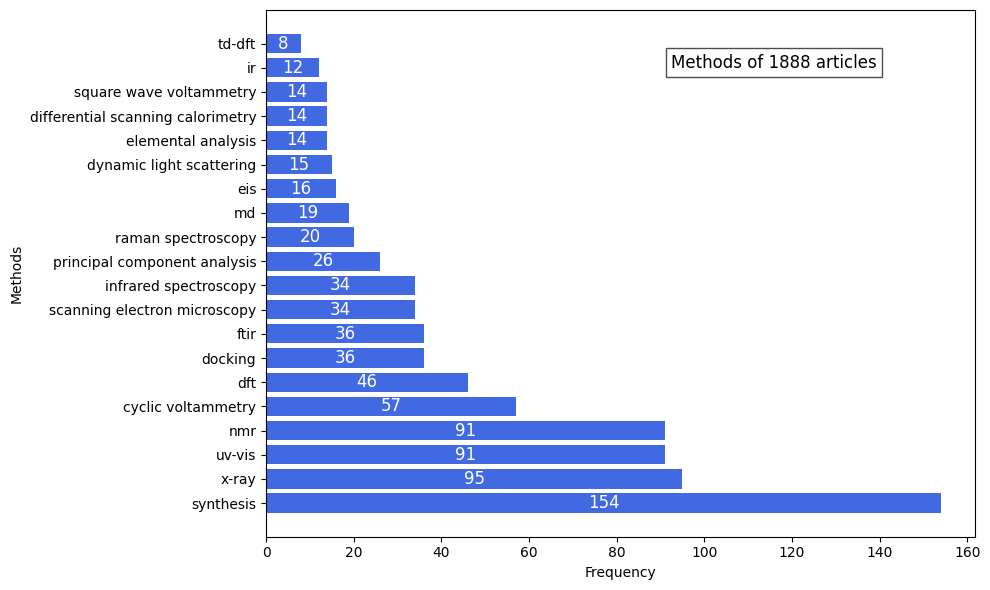

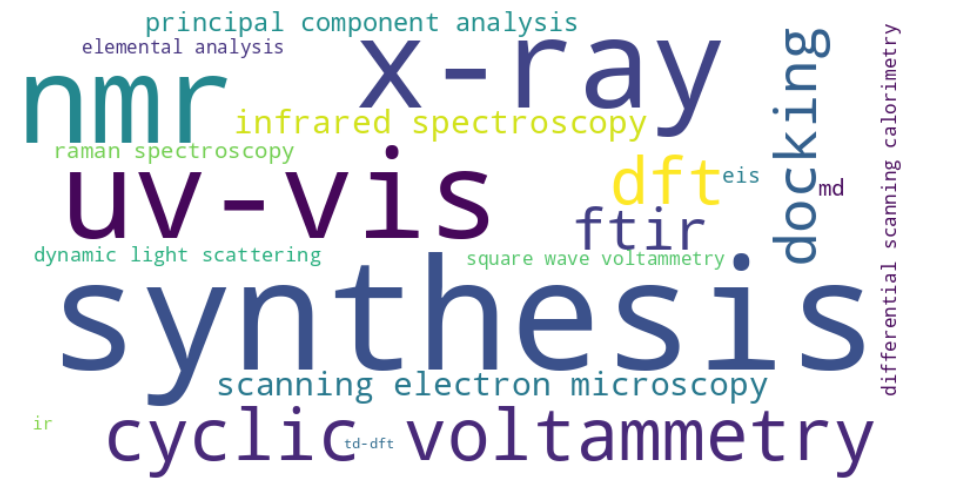

Counter({'synthesis': 154, 'x-ray': 95, 'uv-vis': 91, 'nmr': 91, 'cyclic voltammetry': 57, 'dft': 46, 'docking': 36, 'ftir': 36, 'scanning electron microscopy': 34, 'infrared spectroscopy': 34, 'principal component analysis': 26, 'raman spectroscopy': 20, 'md': 19, 'eis': 16, 'dynamic light scattering': 15, 'elemental analysis': 14, 'differential scanning calorimetry': 14, 'square wave voltammetry': 14, 'ir': 12, 'td-dft': 8, 'molecular networking': 7, 'fluorescence spectroscopy': 7, 'hf': 7, 'mass spectrometry': 7, 'hplc-dad': 7, 'transmission electron microscopy (tem)': 7, '3-dipolar cycloaddition': 6, 'sol-gel method': 6, 'thermogravimetric analysis (tga)': 6, 'column chromatography': 6, 'tga': 6, 'gc-ms': 6, 'kinetic studies': 6, 'gas chromatography-mass spectrometry (gc-ms)': 6, 'pls-da': 5, 'dpph assay': 5, 'atomic force microscopy (afm)': 5, 'esi-ms': 5, 'centrifugation': 5, 'characterization': 5, 'chronoamperometry': 5, 'differential pulse voltammetry': 5, 'mechanochemistry': 5

In [4]:
Methods = data['Methods Applied'].dropna()

all_Methods = (Methods.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))

all_Methods = all_Methods[all_Methods != ""]
mapped_Methods = all_Methods.apply(lambda x: reverse_map_Method(x, MethodsApplied_mapping))
Method_counts_geral = Counter(mapped_Methods)
top_Methods = Method_counts_geral.most_common(20)
#print(top_Methods)
Methods, counts = zip(*top_Methods)

plot_Method_bar(top_Methods, context_label="Methods of 1888 articles")
plot_Method_wordcloud(dict(top_Methods))
print(Method_counts_geral)


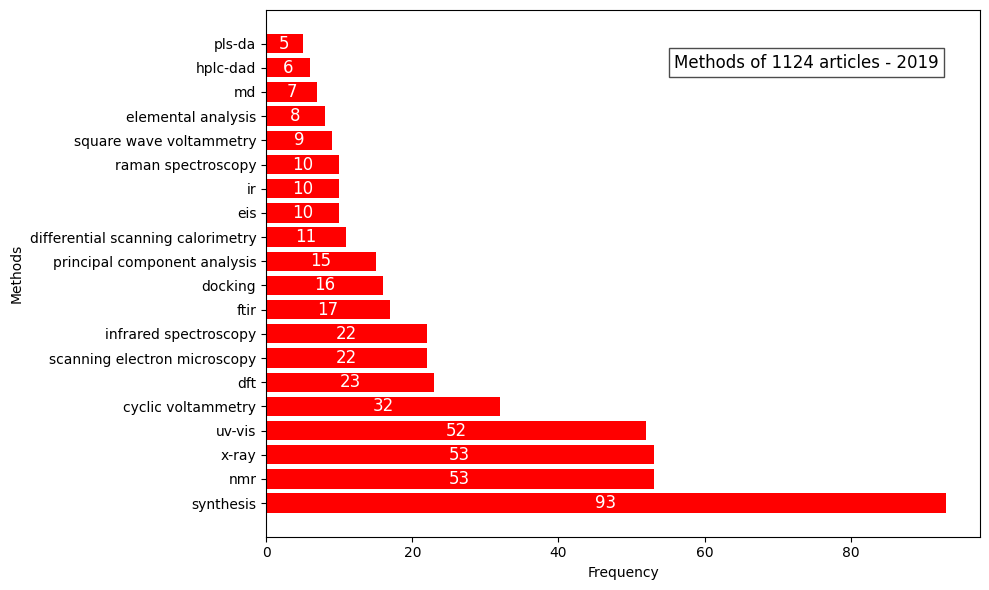

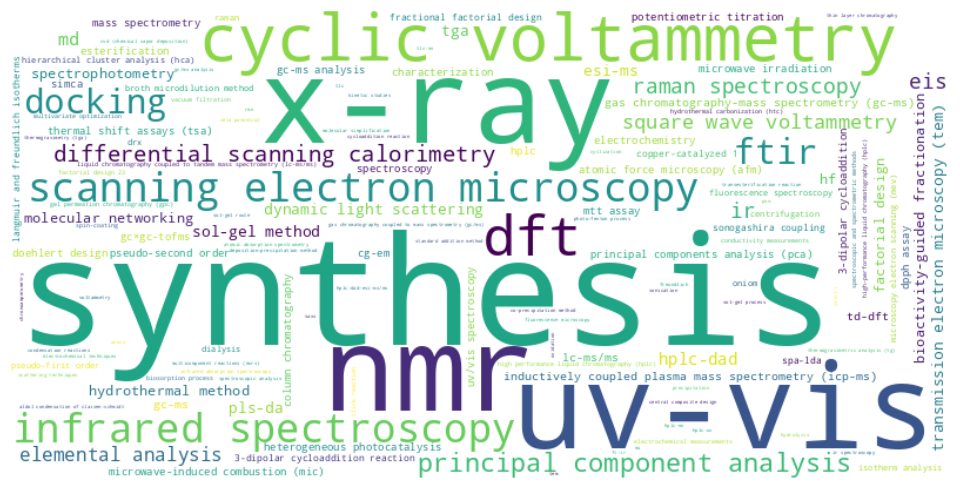

In [ ]:
# Filter only articles from the year 2019
data_2019 = data[data['Year'] == 2019]


Methods = data_2019['Methods Applied'].dropna()
all_Methods = (Methods.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))

all_Methods = all_Methods[all_Methods != ""]

mapped_Methods = all_Methods.apply(lambda x: reverse_map_Method(x, MethodsApplied_mapping))
Method_counts_2019 = Counter(mapped_Methods)
top_Methods = Method_counts_2019.most_common(20)
Methods, counts = zip(*top_Methods)

plot_Method_bar(top_Methods, context_label="Methods of 1124 articles - 2019", bar_color="red")
plot_Method_wordcloud(Method_counts_2019)


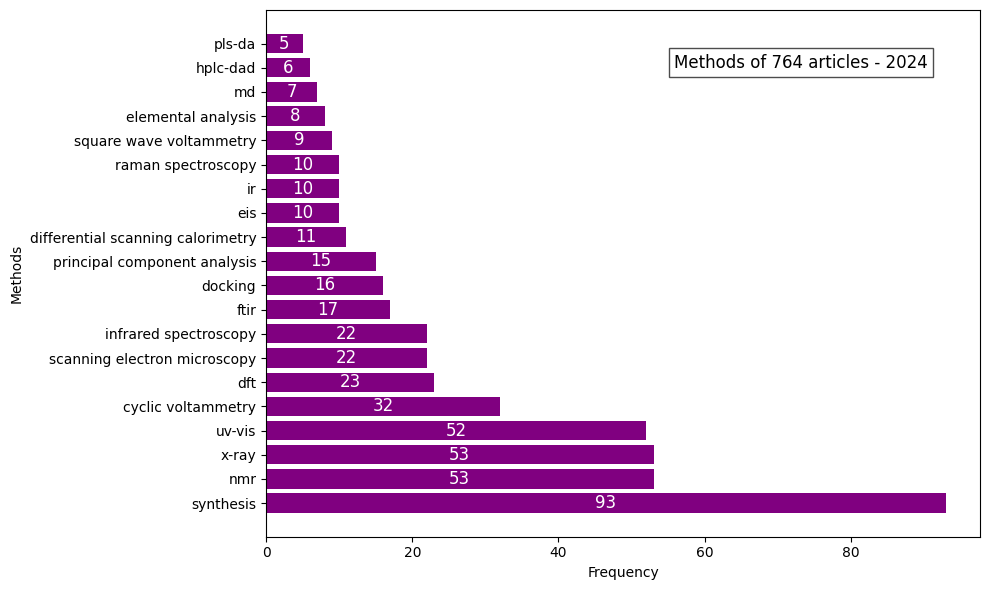

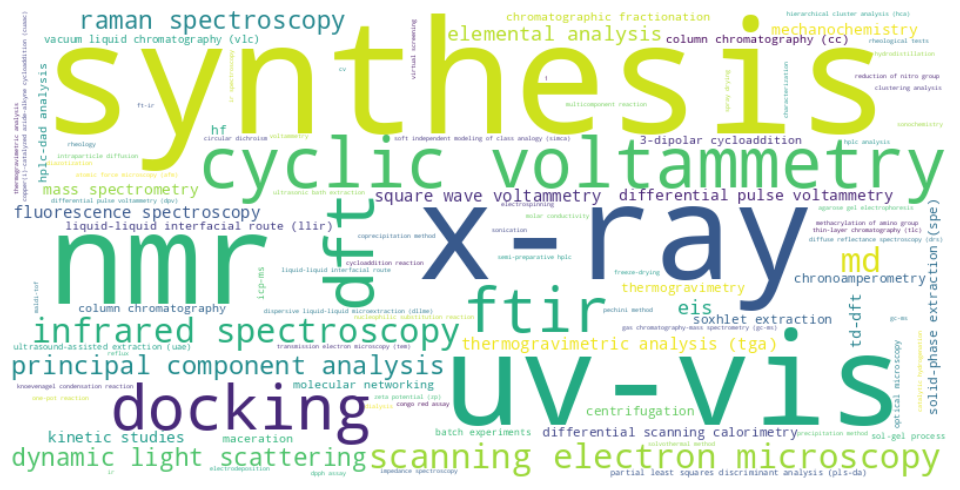

In [ ]:
data_2019 = data[data['Year'] == 2024]

Methods = data_2019['Methods Applied'].dropna()

all_Methods = (Methods.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))
all_Methods = all_Methods[all_Methods != ""]

mapped_Methods = all_Methods.apply(lambda x: reverse_map_Method(x, MethodsApplied_mapping))
Method_counts_2024 = Counter(mapped_Methods)
top_Methods = Method_counts_2019.most_common(20)
Methods, counts = zip(*top_Methods)

plot_Method_bar(top_Methods, context_label="Methods of 764 articles - 2024", bar_color="purple")
plot_Method_wordcloud(Method_counts_2024)

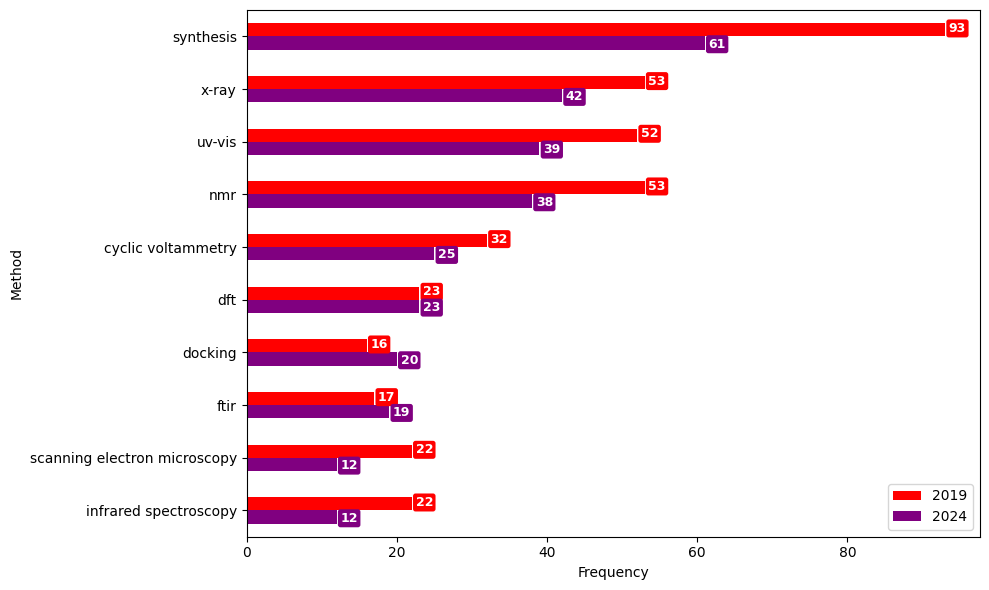

In [ ]:
plot_comparison_bar(
    counts_a=Method_counts_2019,
    counts_b=Method_counts_2024,
    label_a="2019",
    label_b="2024",
    #title="Method Frequency Comparison: 2019 vs 2024"
)